In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
df = pd.read_csv("data/King_County_House_prices_dataset.csv")

In [2]:
df_bedrooms_price1 = df.query("bedrooms >= 4 and bedrooms <= 6 and price >= 100000") # filter bedrooms ragne & price range
price = df[["price", "bedrooms"]]

<AxesSubplot:xlabel='bedrooms'>

<Figure size 720x720 with 0 Axes>

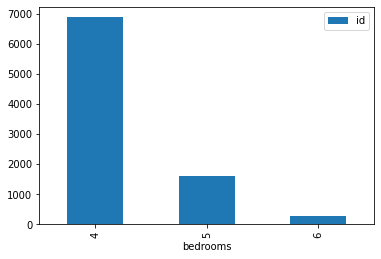

In [17]:
df_bedrooms1 = df.query("bedrooms >= 4 and bedrooms <= 6")
groups = df_bedrooms1.groupby(['bedrooms']).count()
groups
plt.figure(figsize=(10, 10))
groups.plot.bar(y = "id")

In [4]:
#all_bedrooms = df.query("bedrooms >= 4 and bedrooms <= 6")
all_bedrooms = all_bedrooms.count()
#sns.barplot(x="bedrooms",y="count", data=all_bedrooms)
#plt.show()
groups = df.groupby(['bathrooms'])['price'].count()
plt.figure(figsize=(10, 10))
all_bedrooms.plot.bar()

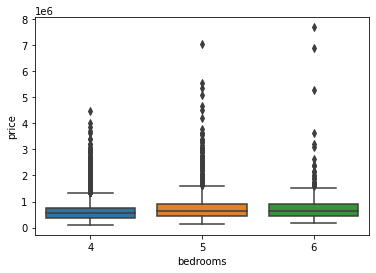

In [20]:
df_bedrooms_price1 = df.query("bedrooms >= 4 and bedrooms <= 6")
sns.boxplot(x="bedrooms", y="price", data=df_bedrooms_price1)
plt.show()

In [ ]:

df_bedrooms = df.query("bedrooms == 4") # filter database for only 4 bedrooms
df_bedrooms_price = df.query("bedrooms >= 4 and bedrooms <= 6") # filter bedrooms ragne & price range
#rooms_price = df.groupby(["price", "bedrooms"]) # group price & bedrooms
df_bedrooms_price = df_bedrooms_price.sort_values("price", ascending=True)
df_bedrooms_price = df_bedrooms_price.head(15)
df_bedrooms_price.plot(x='price', y='bedrooms', kind='bar', color='darkorchid');


In [ ]:

intercept, slope = results.params
intercept

fig, ax = plt.subplots(figsize=(8, 4))
x = df.price

ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between Price and Number of Bedroonms')

ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("Bedrooms");
ax.set_xlabel("Price");

In [ ]:
import statsmodels.api as sms
X = df[["bedrooms"]]
y = df.price
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

In [ ]:
#job_df = df[['bedrooms', 'price']]
#job_df = job_df[job_df.bedrooms.isin(['4', '5', '6'])].groupby(['price', 'bedrooms']).size().reset_index(name = 'size')

#pivot_df = pd.pivot_table(job_df, values='size', index=['price'], columns=['bedrooms']).reset_index()
#pivot_df.plot.bar(y=['4', '5', '6'], x='price', rot = 45, figsize=(10,10))
#pivot_df.head()

In [ ]:
groups = df.groupby(['bathrooms'])['price'].count()
plt.figure(figsize=(10, 10))
groups.plot.bar()